**Questions #1 and #2**

**Question 1 - Effect size**

In [10]:
import nsfg
preg = nsfg.ReadFemPreg()

In [11]:
live = preg[preg.outcome == 1]

In [12]:
firsts = live[live.birthord ==1]

In [13]:
others = live[live.birthord !=1]

In [14]:
run ThinkStats2

In [15]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [16]:
others.totalwgt_lb.mean()

7.325855614973262

*Comparing means, we can say that 'others' babies are slightly heavier than 'first' babies*

In [17]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

*Calculating Cohen's d for totalwgt_lb, I find that the difference in means is -0.08 (small)*

In [18]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

*Calculating Cohen's d for prglngth, I find the difference in means is 0.02 (small).
In essence, both differences (totalwgt_lb and prglngth) are not significant.*

**Question 2 - Actual vs. Biased**

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import thinkstats2

In [3]:
import thinkplot

*Make a PMF of numkdhh, the number of children under 18 in the respondent's household.*

In [4]:
numkdhh_hist = thinkstats2.Hist(resp.numkdhh)

In [5]:
pmf_numkdhh = thinkstats2.Pmf(numkdhh_hist, label = 'actual')

In [6]:
pmf_numkdhh

Pmf({0: 0.46617820227659301, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.087138558157791451, 4: 0.025644380478869556, 5: 0.010728771424833181})

*Display the PMF.*

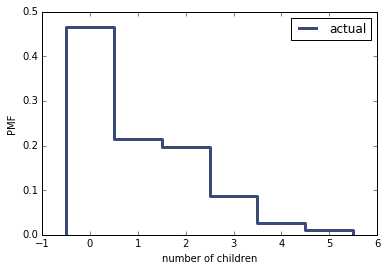

In [7]:
thinkplot.Pmfs([pmf_numkdhh])
thinkplot.Show(xlabel='number of children', ylabel='PMF')

In [8]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

*Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.*

In [9]:
biased_pmf = BiasPmf(pmf_numkdhh, label='observed')

*Display the actual Pmf and the biased Pmf on the same axes.*

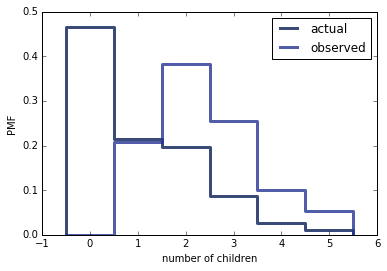

In [10]:
thinkplot.Pmfs([pmf_numkdhh, biased_pmf])
thinkplot.Show(xlabel='number of children', ylabel='PMF')

*Compute the means of the two Pmfs.*

In [11]:
print pmf_numkdhh.Mean()

1.02420515504


In [12]:
print biased_pmf.Mean()

2.40367910066
